# `Data Description`

Dataset consists customer information for a customer churn prediction problem. It includes the following columns:

**CustomerID**: Unique identifier for each customer.


**Name**: Name of the customer.


**Age: Age of the customer.**


**Gender**: Gender of the customer (Male or Female).


**Location**: Location where the customer is based, with options including Houston, Los Angeles, Miami, Chicago, and New York.


**Subscription_Length_Months**: The number of months the customer has been subscribed.


**Monthly_Bill**: Monthly bill amount for the customer.


**Total_Usage_GB**: Total usage in gigabytes.


**Churn**: A binary indicator (1 or 0) representing whether the customer has churned (1) or not (0).

# Customer Churn Prediction
**Author**: Lahari  
**Goal**: Predict which customers are likely to churn using machine learning.

This project includes:
- Data Cleaning & Preprocessing
- Exploratory Data Analysis
- Model Training (Logistic, Random Forest)
- Evaluation and Insights


In [2]:
# importing required libraries

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'customer_churn_large_dataset.xlsx'

In [ ]:
# Basic dataset info
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Shape: (100000, 9)

Data types:
 CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

Missing values:
 CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


# `Exploratory Data Analysis (EDA)`

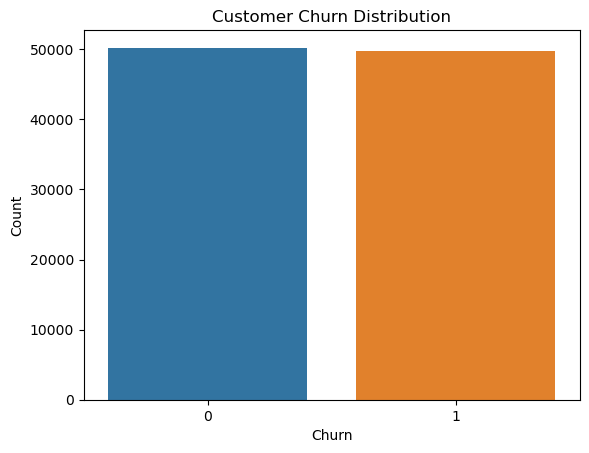

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn countplot
sns.countplot(data=df, x='Churn')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [ ]:
churn_pct = df['Churn'].value_counts(normalize=True) * 100
print("Churn % breakdown:\n", churn_pct)


Churn % breakdown:
 Churn
0    50.221
1    49.779
Name: proportion, dtype: float64


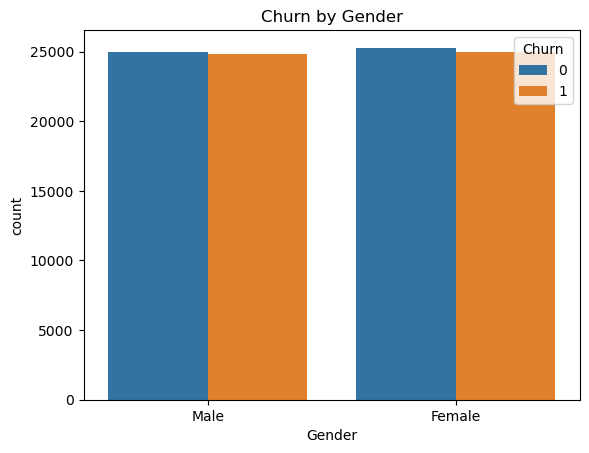

In [ ]:
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()


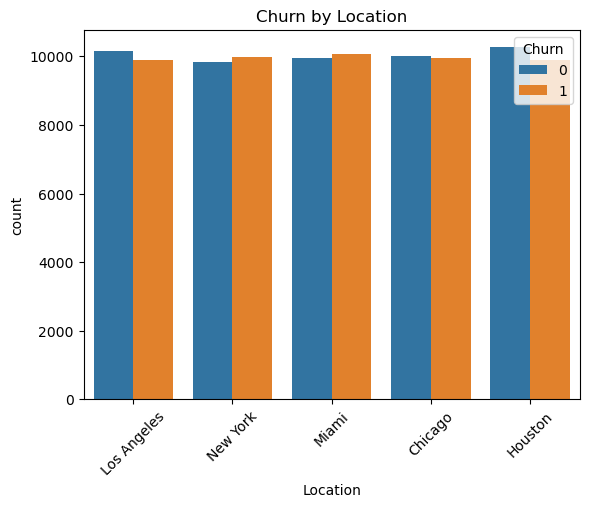

In [ ]:
sns.countplot(data=df, x='Location', hue='Churn')
plt.title('Churn by Location')
plt.xticks(rotation=45)
plt.show()


### 🧼 Step 6: Data Preprocessing
Now we'll prepare the data for machine learning by:
- Dropping ID and name columns
- Encoding categorical variables
- Splitting into train and test sets


In [ ]:
df = df.drop(['CustomerID', 'Name'], axis=1)


### 🔄 Encode Categorical Features
Convert all categorical variables into numerical format using `pd.get_dummies`.


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,True,False,True,False,False
1,62,1,48.76,172,0,False,False,False,False,True
2,24,5,85.47,460,0,False,False,True,False,False
3,36,3,97.94,297,1,False,False,False,True,False
4,46,19,58.14,266,0,False,False,False,True,False


### 📤 Split Data into Train and Test Sets
Separate the features and target, and split the dataset for training and testing.


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 📌 Logistic Regression - Model 1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluate
print("📊 Logistic Regression Report")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


📊 Logistic Regression Report
[[7082 2997]
 [7005 2916]]
              precision    recall  f1-score   support

           0       0.50      0.70      0.59     10079
           1       0.49      0.29      0.37      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.50      0.50      0.48     20000

Accuracy: 0.4999


### 🌲 Random Forest - Model 2


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("📊 Random Forest Report")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


📊 Random Forest Report
[[5183 4896]
 [5272 4649]]
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     10079
           1       0.49      0.47      0.48      9921

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000

Accuracy: 0.4916


### ✅ Step 8: Model Comparison & Saving

We compare both models and save the better one for future use.


In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.4999
Random Forest Accuracy: 0.4916


In [ ]:
import joblib

# Save model to file
joblib.dump(rf_model, 'churn_model_lahari.pkl')

print("Model saved as churn_model_lahari.pkl")


Model saved as churn_model_lahari.pkl


### 📊 Confusion Matrix - Random Forest
A confusion matrix helps us understand the classification performance by comparing actual vs predicted labels.
This heatmap shows the number of true positives, true negatives, false positives, and false negatives.


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


NameError: name 'y_test' is not defined